<a href="https://colab.research.google.com/github/rohanjadhav41193/MachineLearningPart2/blob/ml2projects/GarbageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt
from google.colab import drive
import pathlib
import tensorflow as tf
import matplotlib.image as mpimg

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.image as mpimg

In [ ]:
!pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)


In [ ]:
dataset_url = "https://drive.google.com/file/d/1GW8GTrmdu4lpU7KfdqFVcUYOVEM7A1QI/view?usp=sharing"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='Garbage classification', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

   8192/Unknown - 0s 0us/step

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/Garbage classification')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

0


In [ ]:
drive.mount('/content/drive/)

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True) # Don't change this.

my_path = "/GarbageDataset/Garbageclassification/" # Your path
gdrive_path = "/content/drive" + my_path # Change according to your locale, if neeeded.
# "/content/drive/My Drive/path/in/google_drive/from/root"

Mounted at /content/drive


In [ ]:
!ls "/ColabNotebooks/"

MyDrive


In [ ]:
list(gdrive_path.glob("*.jpg"))

AttributeError: ignored

In [ ]:
img_list = glob.glob(os.path.join('/GarbageDataset/Garbageclassification/*.jpg'))

In [ ]:
len(img_list)

0

In [ ]:
drive.mount("/content/drive/'My Drive'/ColabNotebooks/GarbageDataset/",force_remount=True)

ValueError: ignored

In [ ]:
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
drive.mount('/content/drive',force_remount=True)
data_dir = 'drive/My Drive/ColabNotebooks/GarbageDataset/Garbageclassificatio
n'
os.listdir(data_dir)  # shows the subfolders I had shared with me

Mounted at /content/drive


['trash76.jpg', 'trash', 'plastic', 'metal', 'glass', 'paper', 'cardboard']

In [ ]:
for label in labels:
    directory = os.path.join(data_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "cardboard":	 403
Images of label "glass":	 501
Images of label "metal":	 410
Images of label "paper":	 594
Images of label "plastic":	 482
Images of label "trash":	 137


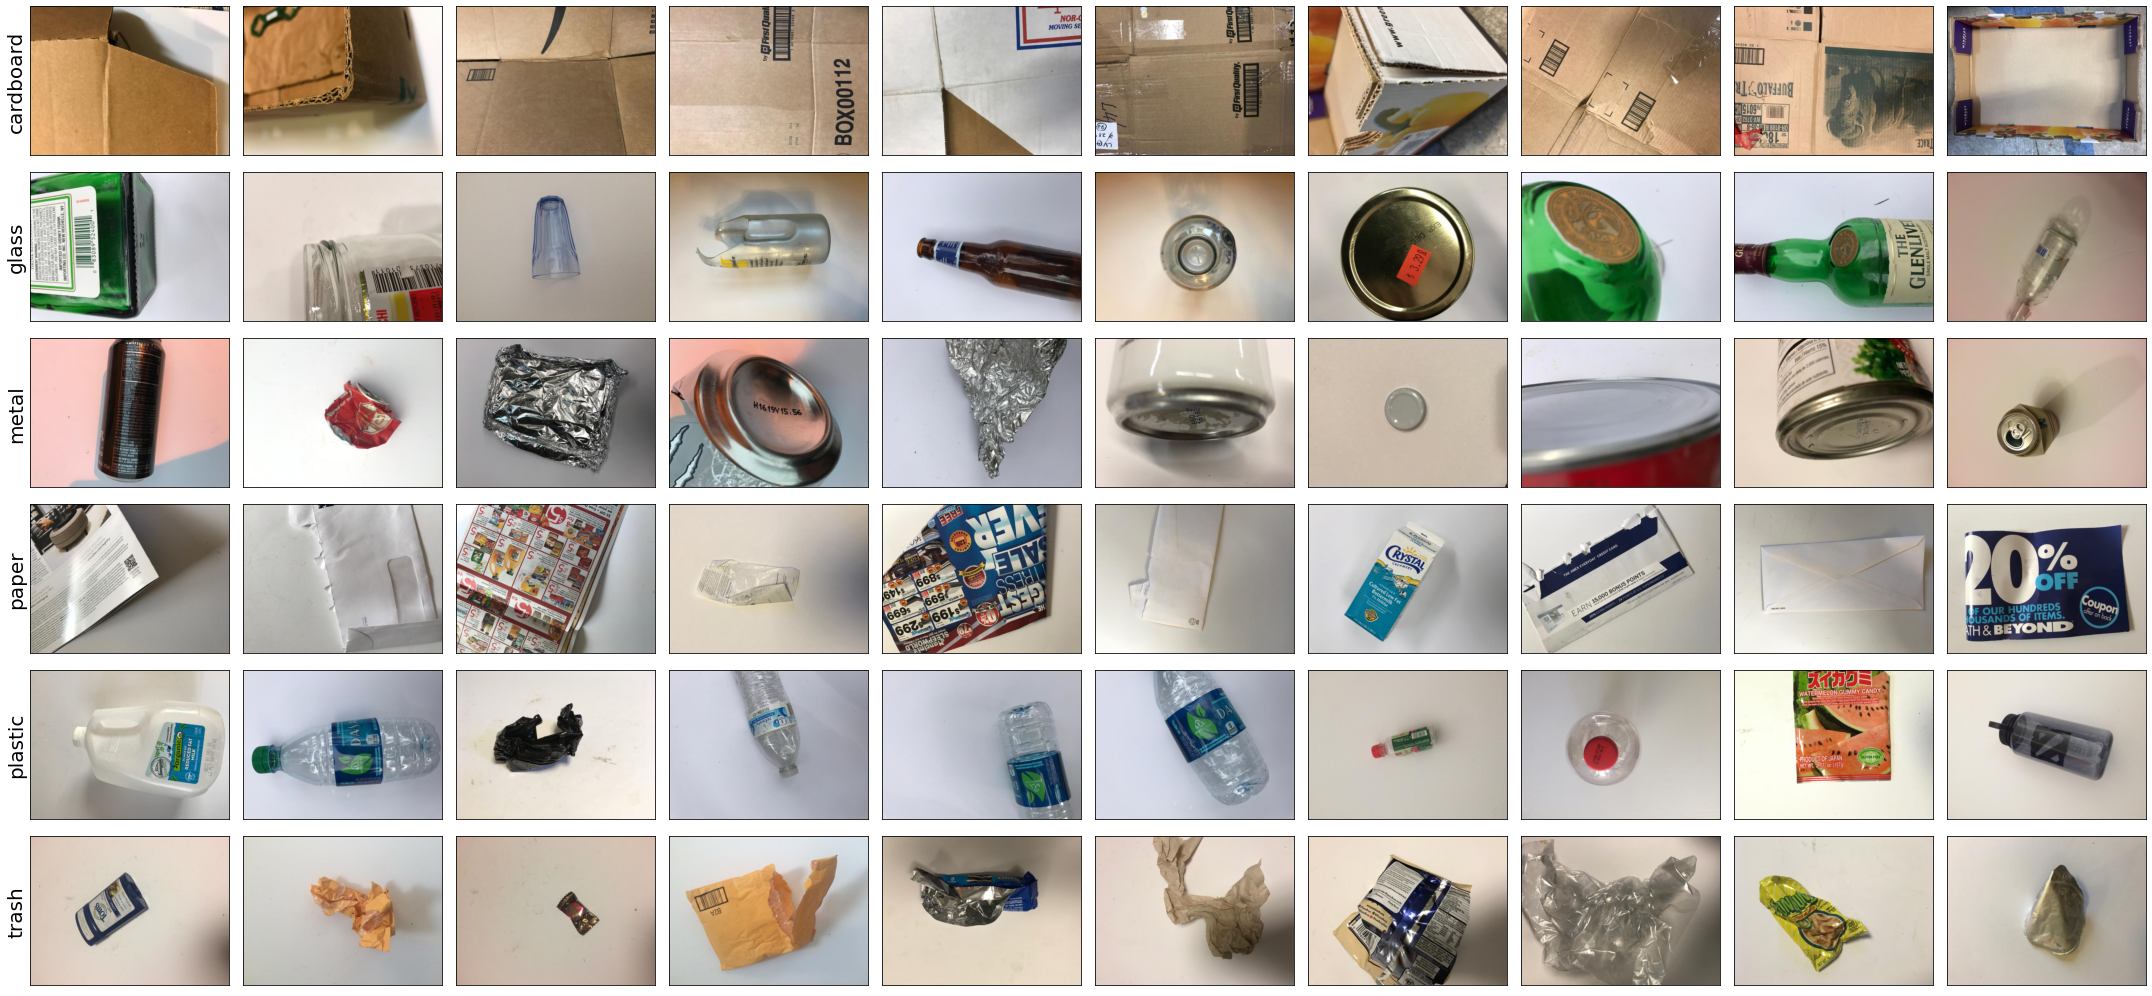

In [ ]:
plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(data_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
# checking size of individual image

directory = os.path.join(data_dir, 'cardboard')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

In [ ]:
model = tf.keras.models.load_model("./lastone.h5")
#model = tf.lite.TFLiteConverter.from_keras_model(export_dir)
model.summary()

OSError: ignored

In [ ]:
import tensorflow as tf
face_recognition_model = tf.keras.models.load_model('face_recognition_model.h5')

OSError: ignored

In [ ]:
from keras.models import load_model

MODEL_PATH = data_dir + '/model.h5'

# Now save model in drive
model.save(MODEL_PATH)

# Load Model
#model = #load_model(MODEL_PATH)
model = tf.keras.models.load_model(MODEL_PATH)

OSError: ignored

In [ ]:
model = 'lastone.h5'
model.save(data_dir)

AttributeError: ignored

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 510, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 382, 510, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 380, 508, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 380, 508, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 190, 254, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 190, 254, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 188, 252, 64)      1

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(lr = 0.0001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# creating generators for combining data and increasing the gainable insights by slightly modifying the images in the dataset

train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(data_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(data_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/50
64/64 [==============================] - 3367s 52s/step - loss: 1.6472 - accuracy: 0.4807 - val_loss: 4.4485 - val_accuracy: 0.1988
Epoch 2/50
64/64 [==============================] - 3329s 52s/step - loss: 1.2562 - accuracy: 0.5820 - val_loss: 9.0487 - val_accuracy: 0.1988
Epoch 3/50
64/64 [==============================] - 3322s 52s/step - loss: 1.1237 - accuracy: 0.6072 - val_loss: 17.8871 - val_accuracy: 0.1988
Epoch 4/50
52/64 [=======================>......] - ETA: 9:39 - loss: 1.0414 - accuracy: 0.6415 